# IMPORT DATA AND PACKAGES


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pydot 
import graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler

data=pd.read_csv('challenger108')
data=data.drop(['vilemaw_kills_team_1', 'vilemaw_kills_team_2'], axis=1)
print(data.shape)


(1913, 87)


# PREPROCESSING 1

Elimination des doublons

In [2]:
data=data.drop_duplicates()
print(data.shape)

(664, 87)


Elimination des ligne avec des données erroné

In [3]:
kill=["kills_top_team_1","kills_top_team_2","kills_bottom_duo_support_team_2","kills_bottom_duo_support_team_1","kills_bottom_duo_carry_team_2","kills_bottom_duo_carry_team_1","kills_middle_team_1","kills_middle_team_2","kills_jungle_team_1","kills_jungle_team_2"]
k=[]
for i, row in data.iterrows():
    for j in kill:
        if (row[j] > 40):
            k.append(i)
            break
data=data.drop(k,axis=0).reindex()
print(data.shape)

(423, 87)


Definiton train set, validation set, et test set.

(338,)


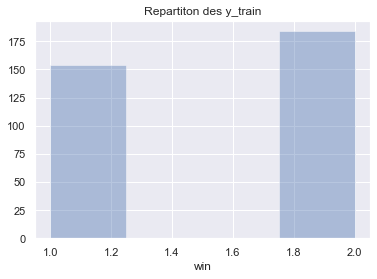

In [4]:
features = data.drop('win',axis='columns')
label = data["win"]
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2)
sns.distplot(y_train,kde =False,).set_title("Repartiton des y_train")
print(y_train.shape)

(85,)


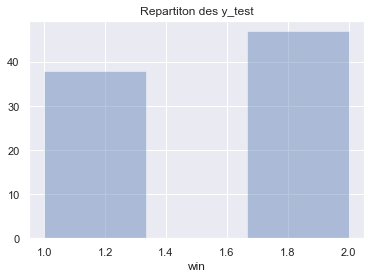

In [5]:
sns.distplot(y_test,kde =False,).set_title("Repartiton des y_test")
print(y_test.shape)

# DATA VISUALISATION

In [6]:
data.head(5)
#Les saut des index sont du au ligne qu'on a supprimés

,win,first_blood,first_tower,first_inhibitor,first_baron,first_dragon,first_rift_herald,tower_kills_team_1,inhibitor_kills_team_1,baron_kills_team_1,...,cs_20m_bottom_duo_support_team_2,xp_20m_bottom_duo_support_team_2,damege_taken_20m_bottom_duo_support_team_2,kills_bottom_duo_carry_team_2,assists_bottom_duo_carry_team_2,deaths_bottom_duo_carry_team_2,gold_earned_20m_bottom_duo_carry_team_2,cs_20m_bottom_duo_carry_team_2,xp_20m_bottom_duo_carry_team_2,damege_taken_20m_bottom_duo_carry_team_2
0,1,1,0,0,0,2,1,6,0,0,...,0.5,204.8,836.5,2.0,3.0,7.0,261.0,5.4,352.7,867.3
1,1,2,0,1,1,2,1,8,1,1,...,1.6,276.7,933.6,6.0,3.0,6.0,486.5,6.4,521.9,525.0
3,1,1,0,1,1,2,1,10,3,1,...,1.8,501.4,789.1,5.0,7.0,6.0,488.0,6.4,512.3,798.3
4,2,1,0,2,1,1,1,5,0,1,...,2.6,413.1,214.4,4.0,23.0,10.0,346.8,3.1,440.2,1078.0
5,1,2,2,1,1,1,2,8,2,2,...,1.5,291.1,276.7,7.0,8.0,8.0,465.7,9.3,520.8,300.5


Text(0.5, 1.0, 'Repartion des victioires')

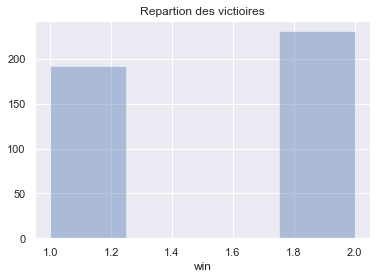

In [7]:
sns.distplot(data["win"],kde =False,).set_title("Repartion des victioires")

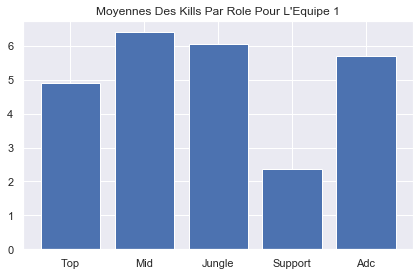

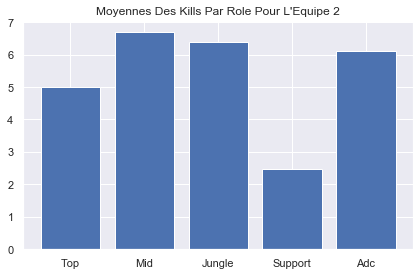

In [8]:
def meanplotter(d, a,s):
    mean = {}
    for y in d:
        if y in a:
            mean[y] = (d[y].mean(axis=0))
    keys=mean.keys()
    vals=mean.values()
    plt.title(s)
    plt.bar(["Top","Mid","Jungle","Support","Adc"],vals)
    plt.tight_layout()
    plt.show()

kill1=["kills_top_team_1","kills_jungle_team_1","kills_middle_team_1","kills_bottom_duo_carry_team_1","kills_bottom_duo_support_team_1"]
kill2=["kills_top_team_2","kills_jungle_team_2","kills_middle_team_2","kills_bottom_duo_carry_team_2","kills_bottom_duo_support_team_2"]


meanplotter(data,kill1,"Moyennes Des Kills Par Role Pour L'Equipe 1")
meanplotter(data,kill2,"Moyennes Des Kills Par Role Pour L'Equipe 2")

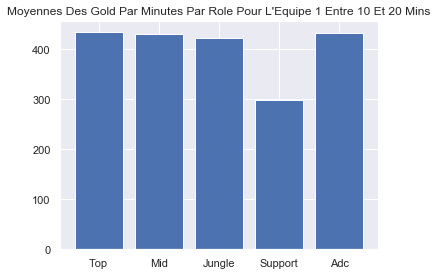

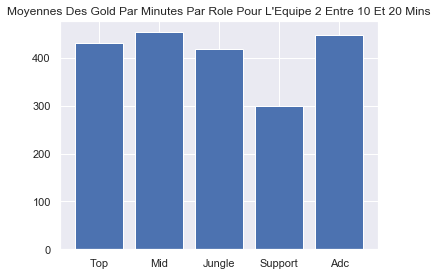

In [9]:
gold_earned1=["gold_earned_20m_top_team_1","gold_earned_20m_jungle_team_1","gold_earned_20m_middle_team_1","gold_earned_20m_bottom_duo_carry_team_1","gold_earned_20m_bottom_duo_support_team_1"]
gold_earned2=["gold_earned_20m_top_team_2","gold_earned_20m_jungle_team_2","gold_earned_20m_middle_team_2","gold_earned_20m_bottom_duo_carry_team_2","gold_earned_20m_bottom_duo_support_team_2"]

meanplotter(data,gold_earned1,"Moyennes Des Gold Par Minutes Par Role Pour L'Equipe 1 Entre 10 Et 20 Mins")
meanplotter(data,gold_earned2,"Moyennes Des Gold Par Minutes Par Role Pour L'Equipe 2 Entre 10 Et 20 Mins")

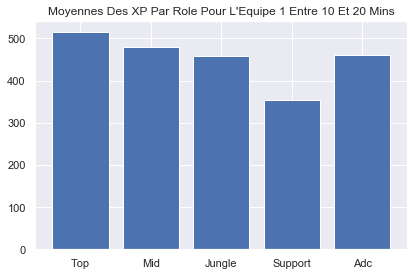

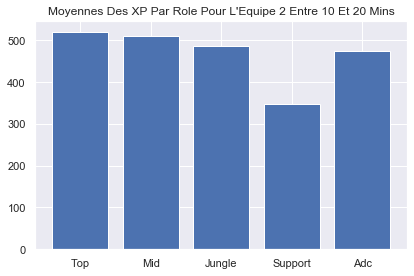

In [10]:
xp1=["xp_20m_top_team_1","xp_20m_jungle_team_1","xp_20m_middle_team_1","xp_20m_bottom_duo_carry_team_1","xp_20m_bottom_duo_support_team_1"]
xp2=["xp_20m_top_team_2","xp_20m_jungle_team_2","xp_20m_middle_team_2","xp_20m_bottom_duo_carry_team_2","xp_20m_bottom_duo_support_team_2"]

meanplotter(data,xp1,"Moyennes Des XP Par Role Pour L'Equipe 1 Entre 10 Et 20 Mins")
meanplotter(data,xp2,"Moyennes Des XP Par Role Pour L'Equipe 2 Entre 10 Et 20 Mins")

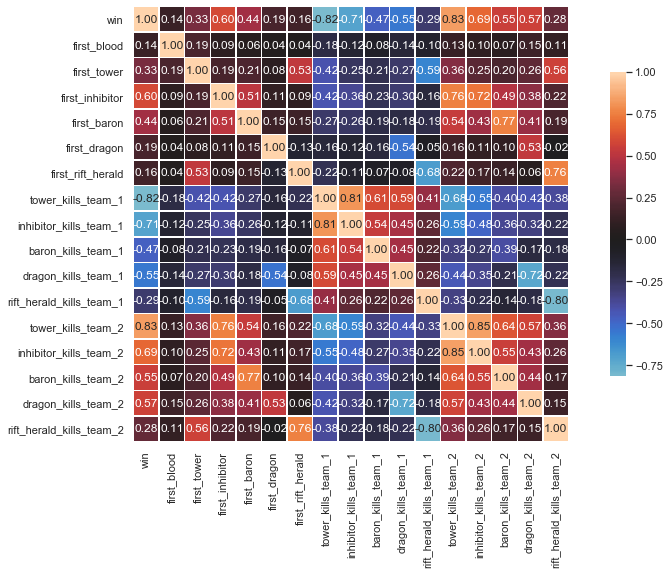

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.iloc[:, : 17].corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

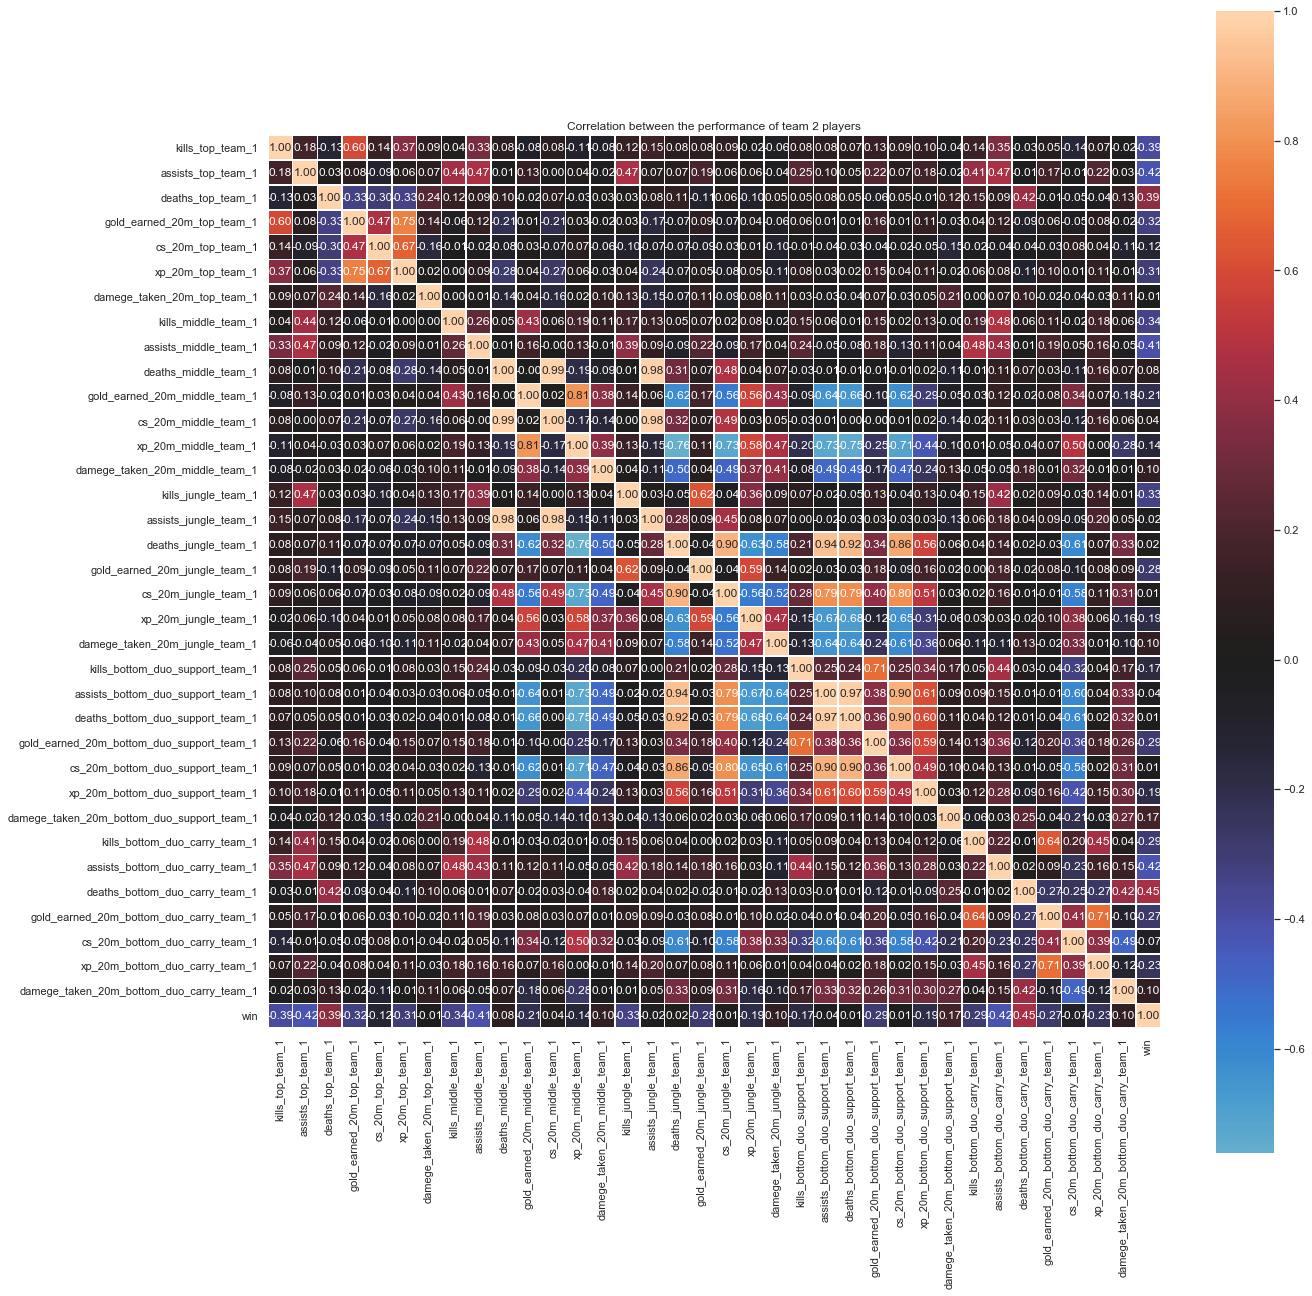

In [12]:
perf1 = data.iloc[:,17:52]
perf1['win'] = data['win']

plt.figure(figsize=(20,30))
plt.title("Correlation between the performance of team 2 players")
sns.heatmap(perf1.corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
)

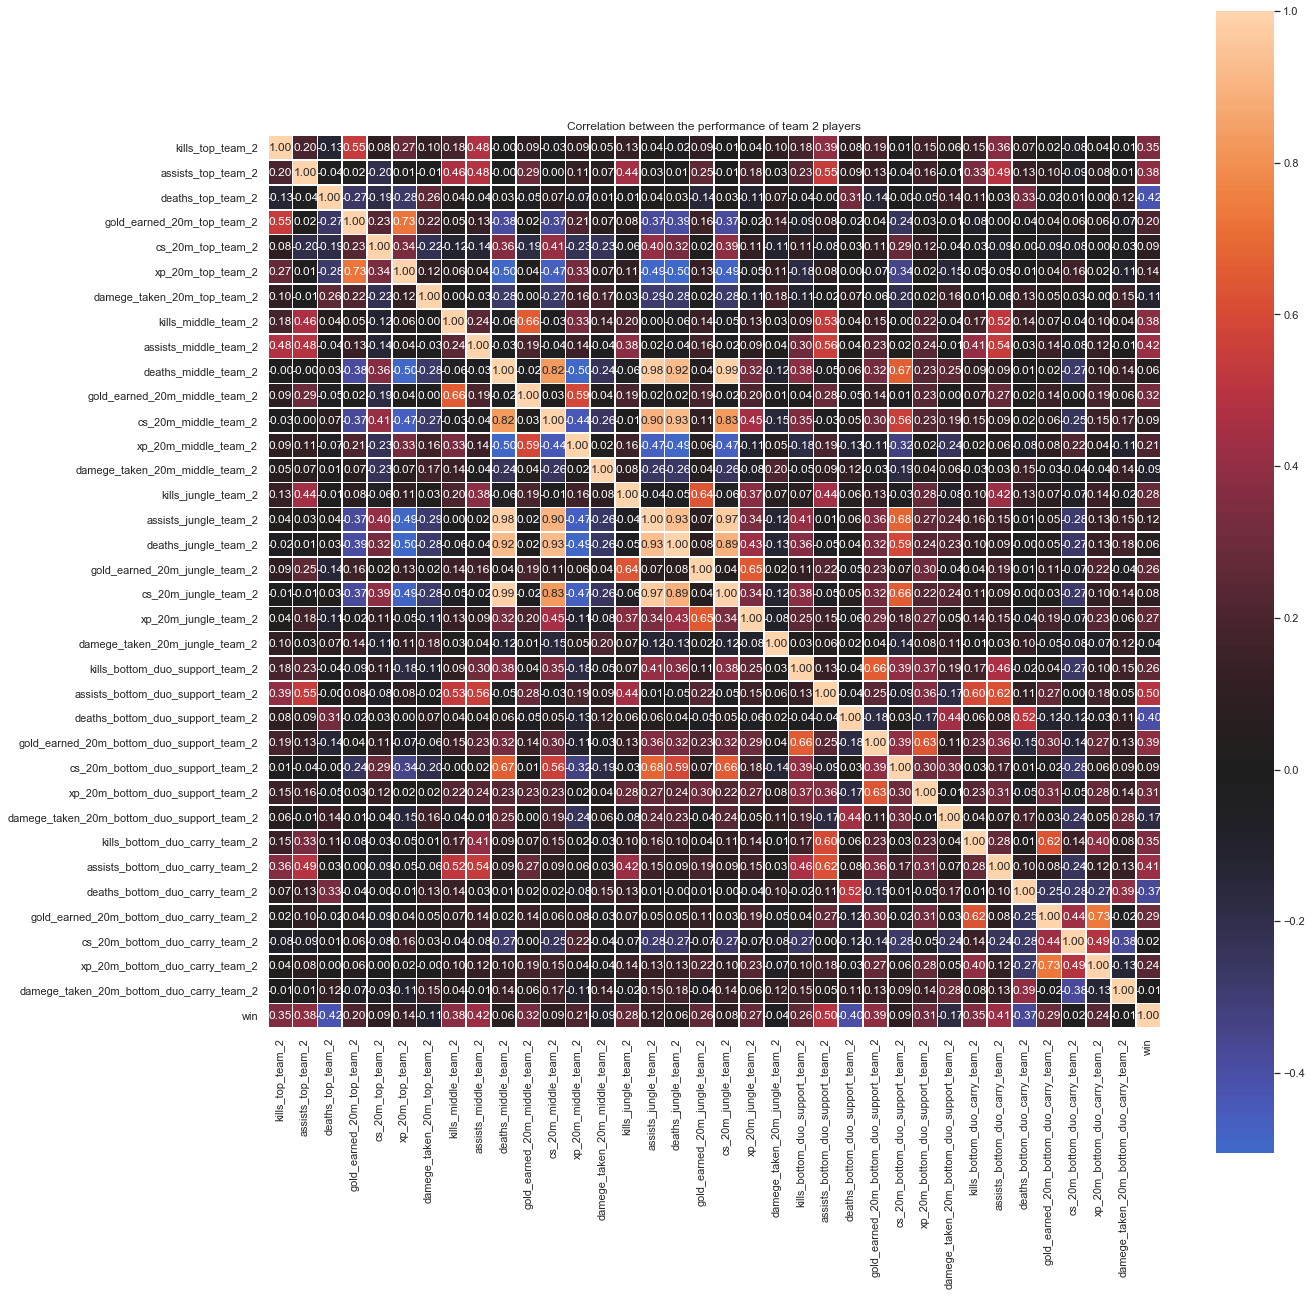

In [13]:
perf2 = data.iloc[:,52:88]
perf2['win'] = data['win']

plt.figure(figsize=(20,30))
plt.title("Correlation between the performance of team 2 players")
sns.heatmap(perf2.corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
)

# OPTIMISATIONS

## ARCHITECTURE

In [14]:
DTree= DecisionTreeClassifier()
DTree.fit(x_train,y_train)
print(DTree.score(x_test,y_test))


0.8705882352941177


## HYPER-PARAMETRES

## PREPROCESSING 2

Normalization 

In [15]:
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)
DTree.fit(x_train_norm,y_train)
print(DTree.score(x_test_norm,y_test))


0.8705882352941177


STANDARDIZATION

In [16]:
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

for i in data.drop('win',axis='columns').columns :
        scale = StandardScaler().fit(x_train_stand[[i]])
        x_train_stand[i] = scale.transform(x_train_stand[[i]])
        x_test_stand[i] = scale.transform(x_test_stand[[i]])

DTree.fit(x_train_stand,y_train)
print(DTree.score(x_test_stand,y_test))


0.8705882352941177


PCA

# TEST 1

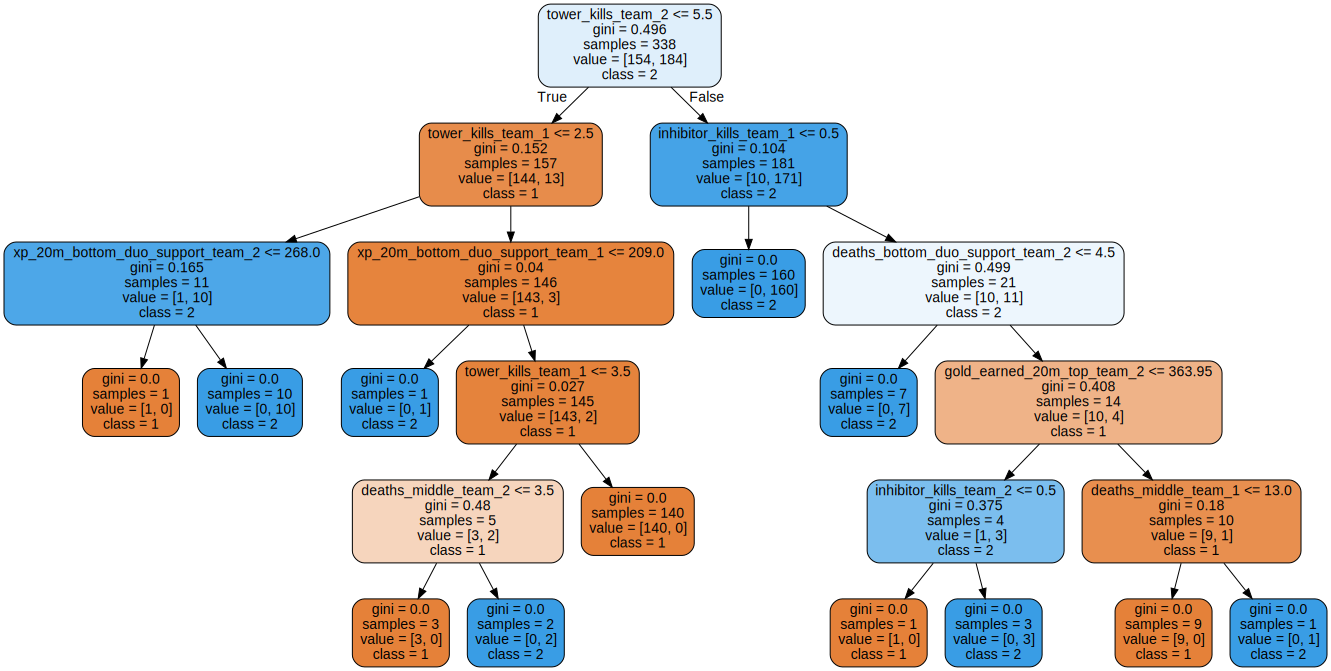

In [17]:
DTree= DecisionTreeClassifier()
DTree.fit(x_train,y_train)

dot_data = tree.export_graphviz(DTree, out_file=None, filled=True, rounded=True, feature_names=x_train.columns, class_names=["1","2"])
graph = graphviz.Source(dot_data)  
graph


[ 30  33  35  38  41  44  46  49  52  55  58  60  63  66  69  71  74  77
  80  82  85  88  91  93  96  99 102 105 107 110 113 116 118 121 124 127
 129 132 135 138 140 143 146 149 152 154 157 160 163 165 168 171 174 176
 179 182 185 187 190 193 196 198 201 204 207 210 212 215 218 221 223 226
 229 232 234 237 240 243 245 248 251 254 257 259 262 265 268 270 273 276
 279 281 284 287 290 292 295 298 301 304]


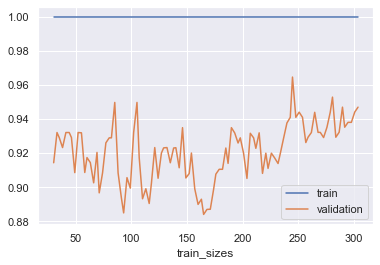

In [18]:
N,train_score,val_score = learning_curve(DTree,x_train,y_train,train_sizes=np.linspace(0.1,1.0,100),cv=10)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()


In [19]:
confusion_matrix(y_test,DTree.predict(x_test))


array([[34,  4],
       [ 5, 42]], dtype=int64)

              precision    recall  f1-score   support

           1       0.89      0.87      0.88        39
           2       0.89      0.91      0.90        46

    accuracy                           0.89        85
   macro avg       0.89      0.89      0.89        85
weighted avg       0.89      0.89      0.89        85



Text(0.5, 1.0, 'Repartion des victioires')

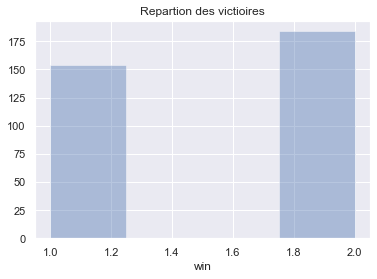

In [20]:
print(classification_report(DTree.predict(x_test),y_test))

sns.distplot(y_train,kde =False,).set_title("Repartion des victioires")

# TEST 

0.7764705882352941


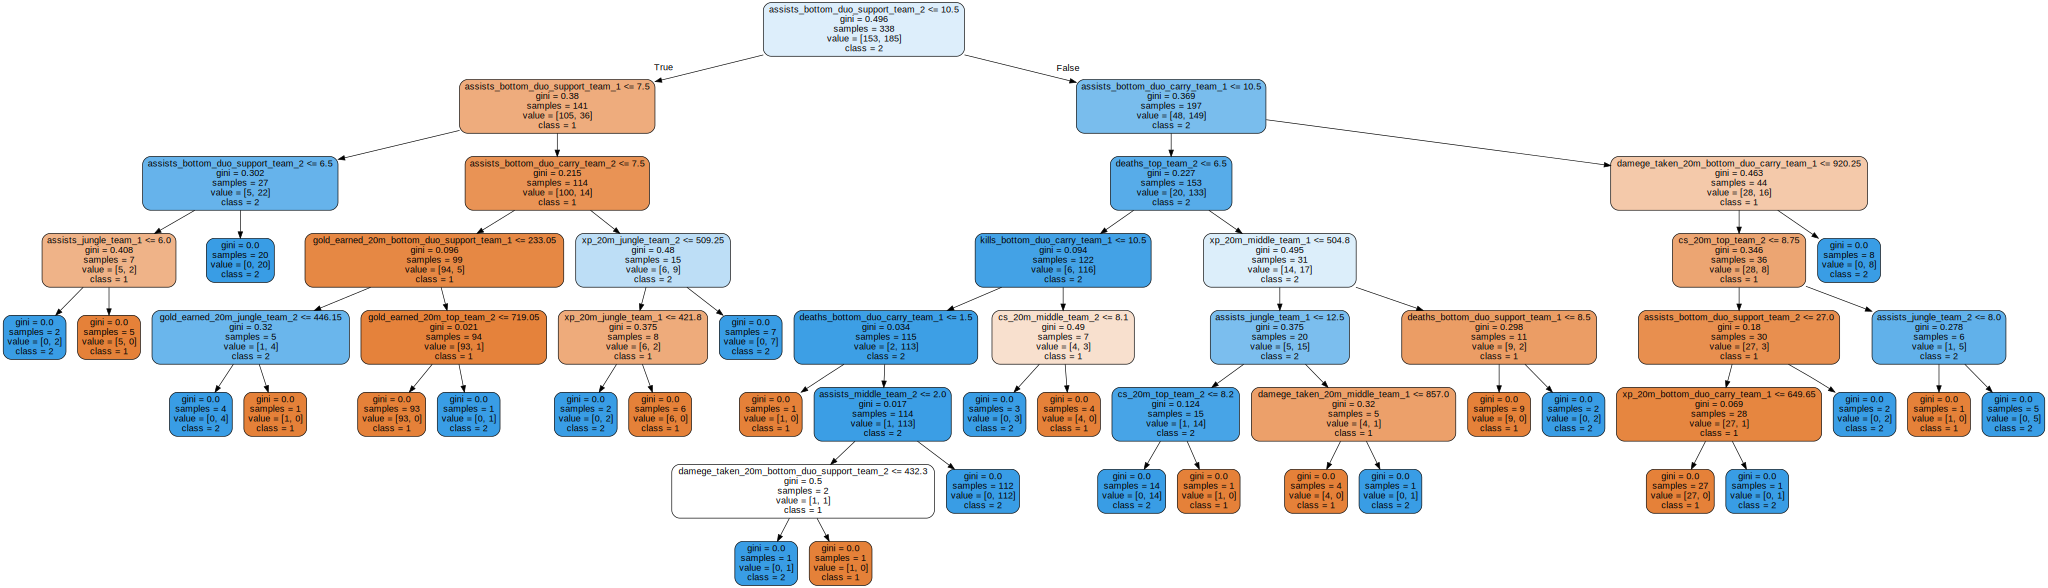

In [21]:
input = data.drop(data.iloc[:,0:17],axis='columns')
target = data["win"]

i_train,i_test,t_train,t_test=train_test_split(input,target,test_size=0.2)
DTree= DecisionTreeClassifier()
DTree.fit(i_train,t_train)
print(DTree.score(i_test,t_test))

dot_data = tree.export_graphviz(DTree, out_file=None, filled=True, rounded=True, feature_names=input.columns, class_names=["1","2"])
graph = graphviz.Source(dot_data)  
graph


0.7764705882352941
[ 30  33  35  38  41  44  46  49  52  55  58  60  63  66  69  71  74  77
  80  82  85  88  91  93  96  99 102 105 107 110 113 116 118 121 124 127
 129 132 135 138 140 143 146 149 152 154 157 160 163 165 168 171 174 176
 179 182 185 187 190 193 196 198 201 204 207 210 212 215 218 221 223 226
 229 232 234 237 240 243 245 248 251 254 257 259 262 265 268 270 273 276
 279 281 284 287 290 292 295 298 301 304]


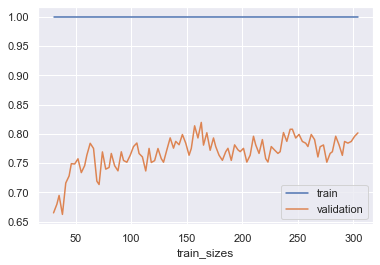

In [22]:
print(DTree.score(i_test,t_test))

confusion_matrix(t_test,DTree.predict(i_test))

N,train_score,val_score = learning_curve(DTree,i_train,t_train,train_sizes=np.linspace(0.1,1.0,100),cv=10)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()
